##### Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

Here is the code to load the data:
* import numpy as np
* import pandas as pd
* import scipy.stats as stats
* import matplotlib.pyplot as plt
* import sklearn
* from sklearn.datasets import load_boston
* boston = load_boston()
* bos = pd.DataFrame(boston.data)

#### Data Preparation:

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [2]:
#This data doesn't seems to be any informative !
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
#Let's first see what's inside the boston dataset
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
#Let's explore all these categories
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
#Target is basically the price which we need to find
boston['target'][:20]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2])

In [6]:
#Feature names are the dependent variables which we need to use for linear regression
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
#About the dataset
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [8]:
#Let's make our data more informative
data = pd.DataFrame(boston.data, columns = boston['feature_names'])

In [9]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
#Now let's add the price column to it
data['Price'] = boston.target

In [11]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Data Preprocessing:

In [12]:
#Describing the data
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
#Checking the null values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


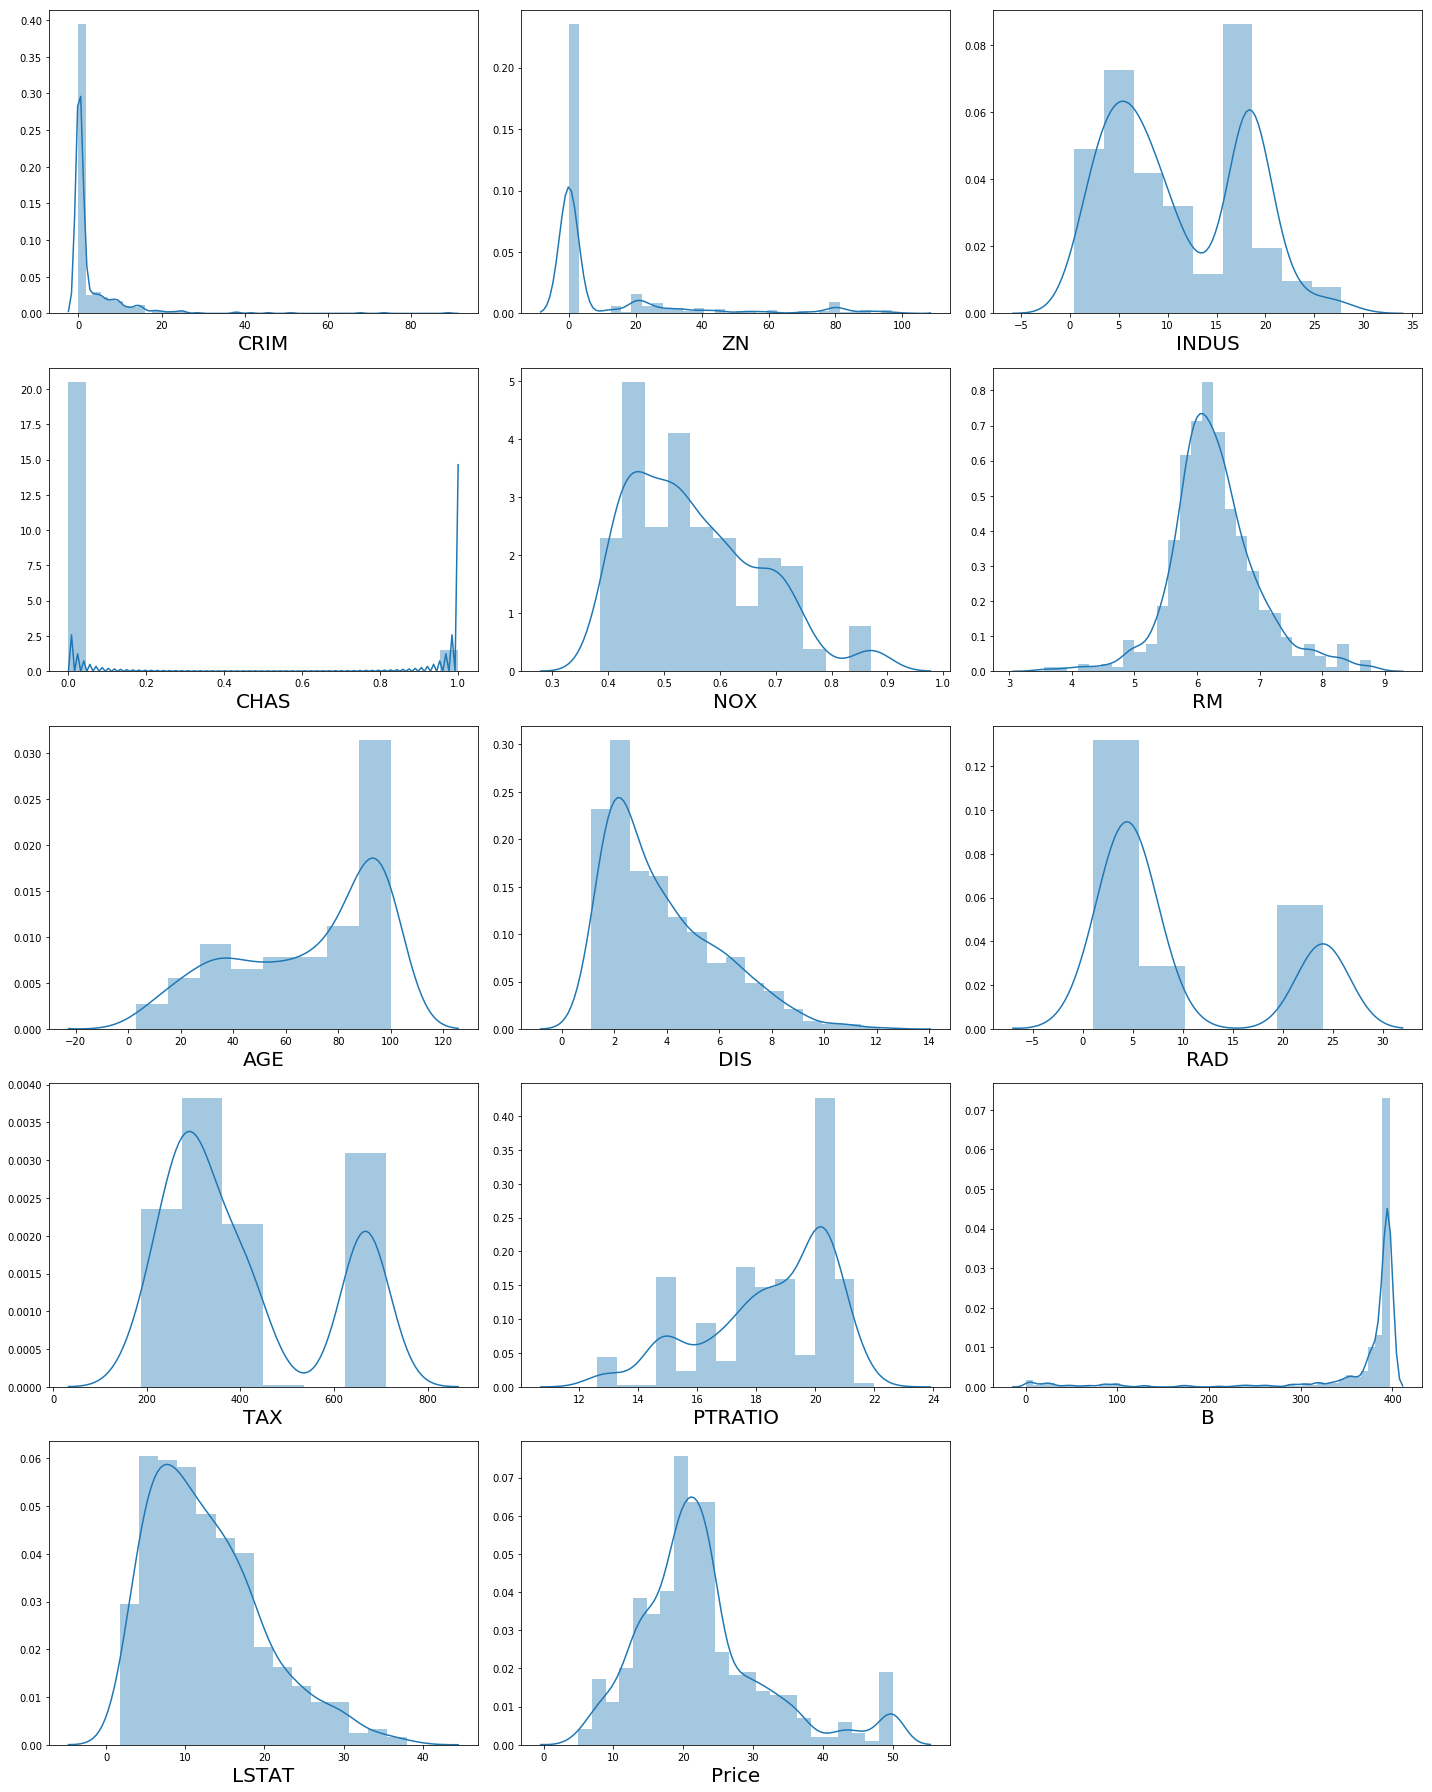

In [14]:
#Great ! There's no null values. 
#Now, let's see how data is distributed for every column

plt.figure(figsize=(20,25))

plotnum = 1

for col in data:
    
    if plotnum < 16:
        ax = plt.subplot(5,3,plotnum)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=20)
        
    plotnum+=1
plt.tight_layout()
plt.show()

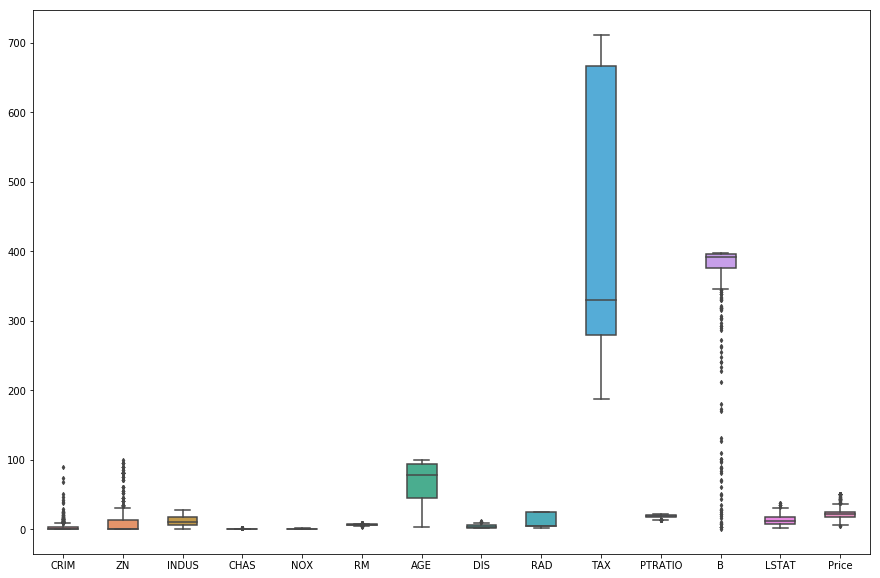

In [15]:
#Data seems to be having outliers

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [16]:
q = data['CRIM'].quantile(0.98)
# we are removing the top 2% data from the CRIM column
data_cleaned = data[data['CRIM']<q]

q = data_cleaned['ZN'].quantile(0.98)
# we are removing the top 2% data from the ZN column
data_cleaned = data_cleaned[data_cleaned['ZN']<q]

q = data_cleaned['B'].quantile(0.15)
# we are removing the bottom 15% data from the B column
data_cleaned = data_cleaned[data_cleaned['B']>q]

q = data_cleaned['LSTAT'].quantile(0.98)
# we are removing the top 2% data from the LSTAT column
data_cleaned = data_cleaned[data_cleaned['LSTAT']<q]

q = data_cleaned['Price'].quantile(0.99)
# we are removing the top 1% data from the LSTAT column
data_cleaned = data_cleaned[data_cleaned['LSTAT']<q]

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


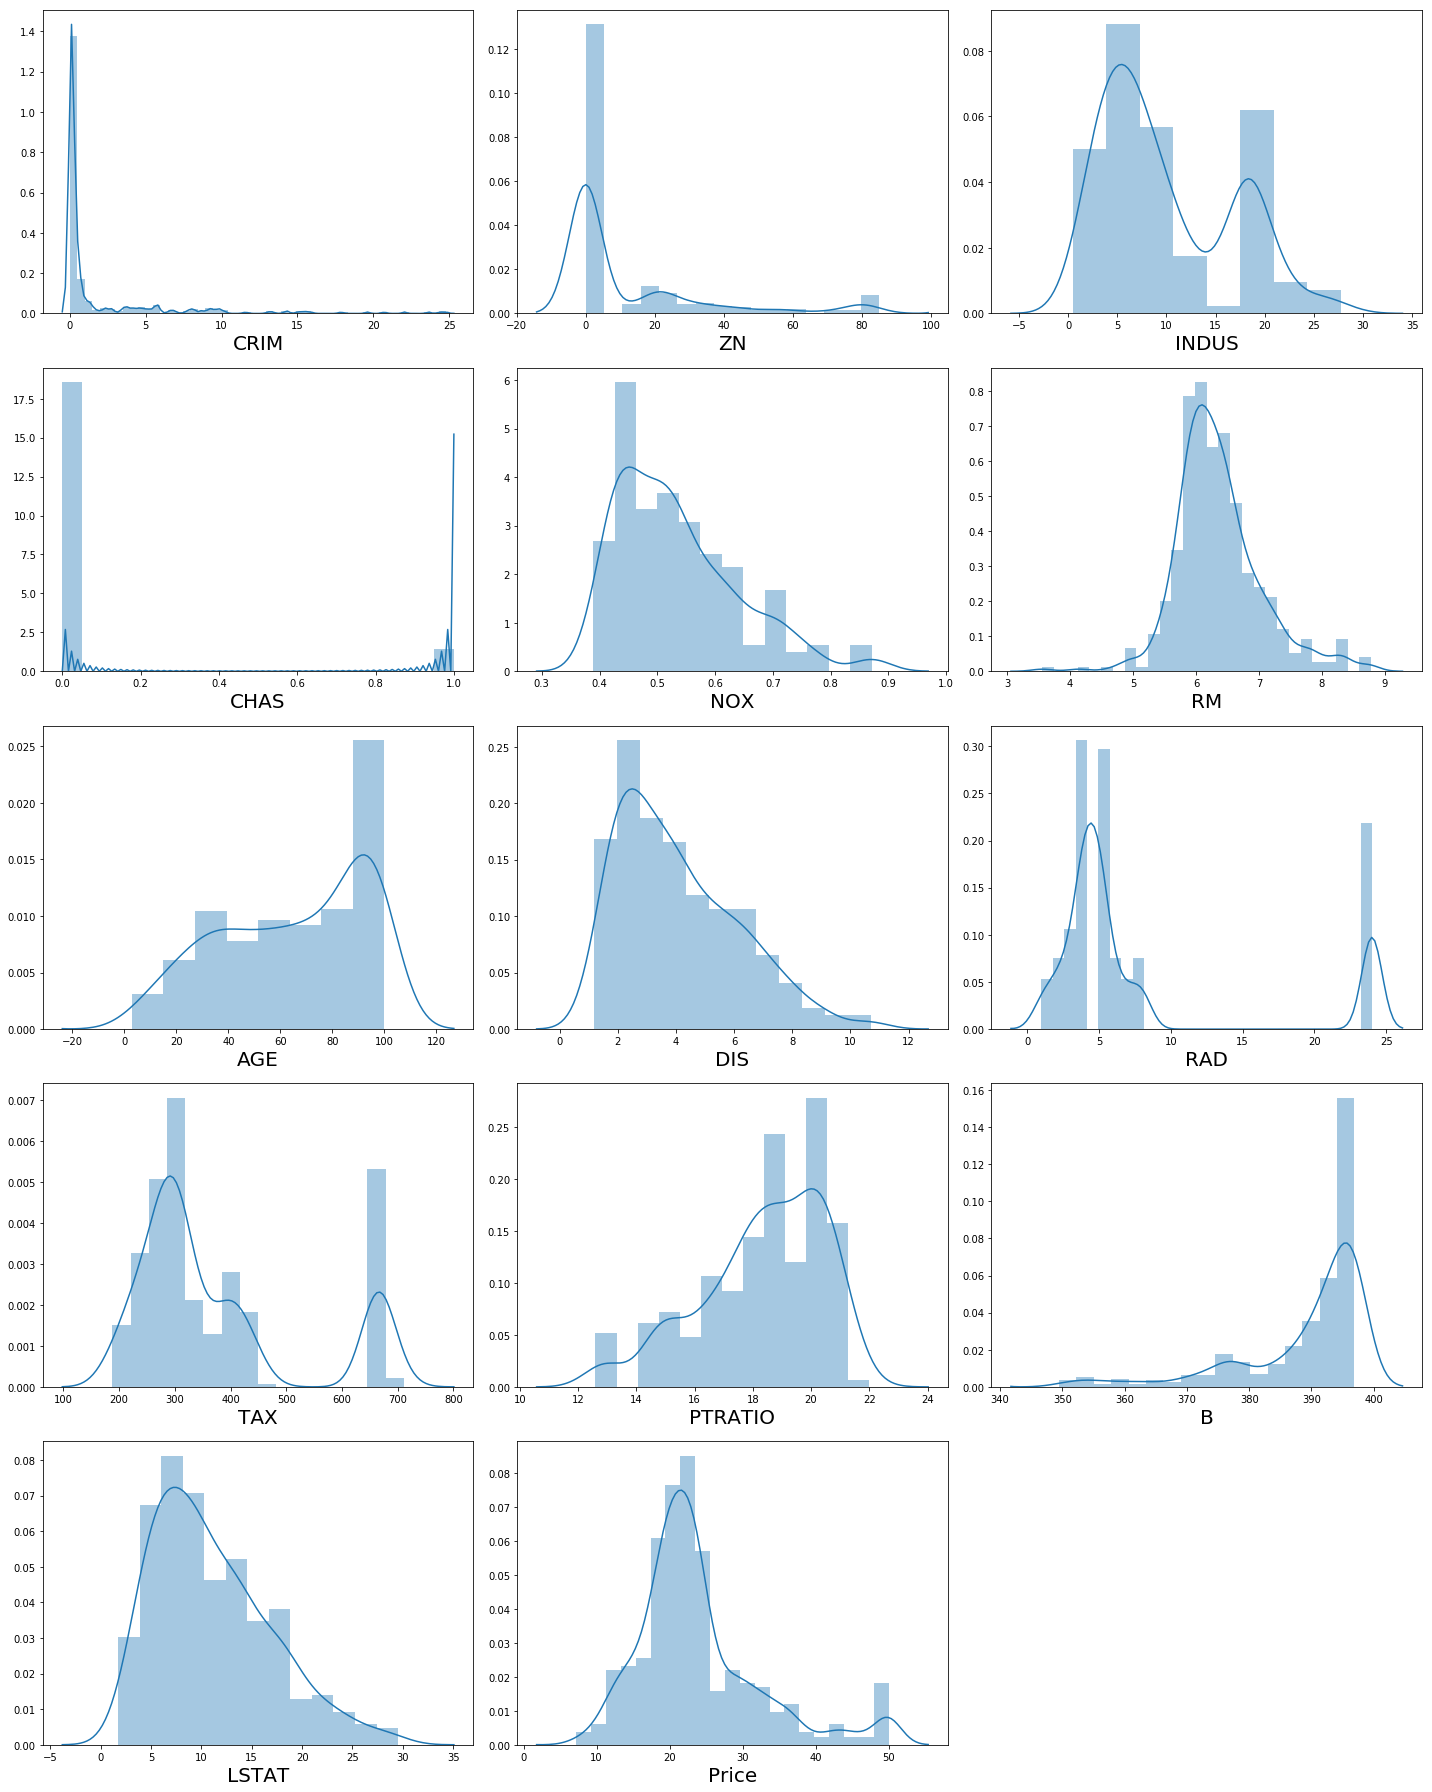

In [17]:
plt.figure(figsize=(20,25))

plotnum = 1

for col in data_cleaned:
    
    if plotnum < 16:
        ax = plt.subplot(5,3,plotnum)
        sns.distplot(data_cleaned[col])
        plt.xlabel(col,fontsize=20)
        
    plotnum+=1
plt.tight_layout()
plt.show()

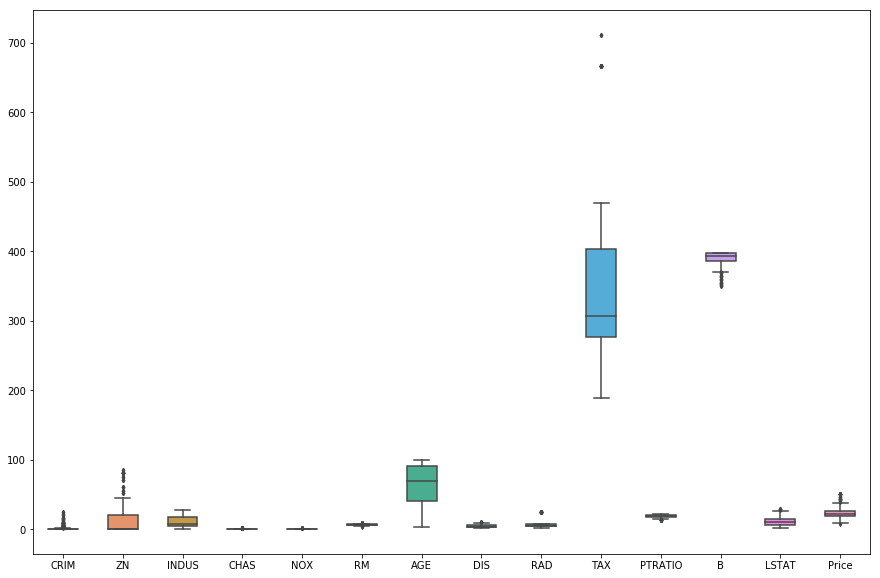

In [18]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_cleaned, width= 0.5,ax=ax,  fliersize=3)

Now, the data seems to be little better !

In [19]:
#Now, let's find the columns which are corelated to our price column

features = data_cleaned.drop(columns= ['Price'], axis = 1)
target = data_cleaned['Price']

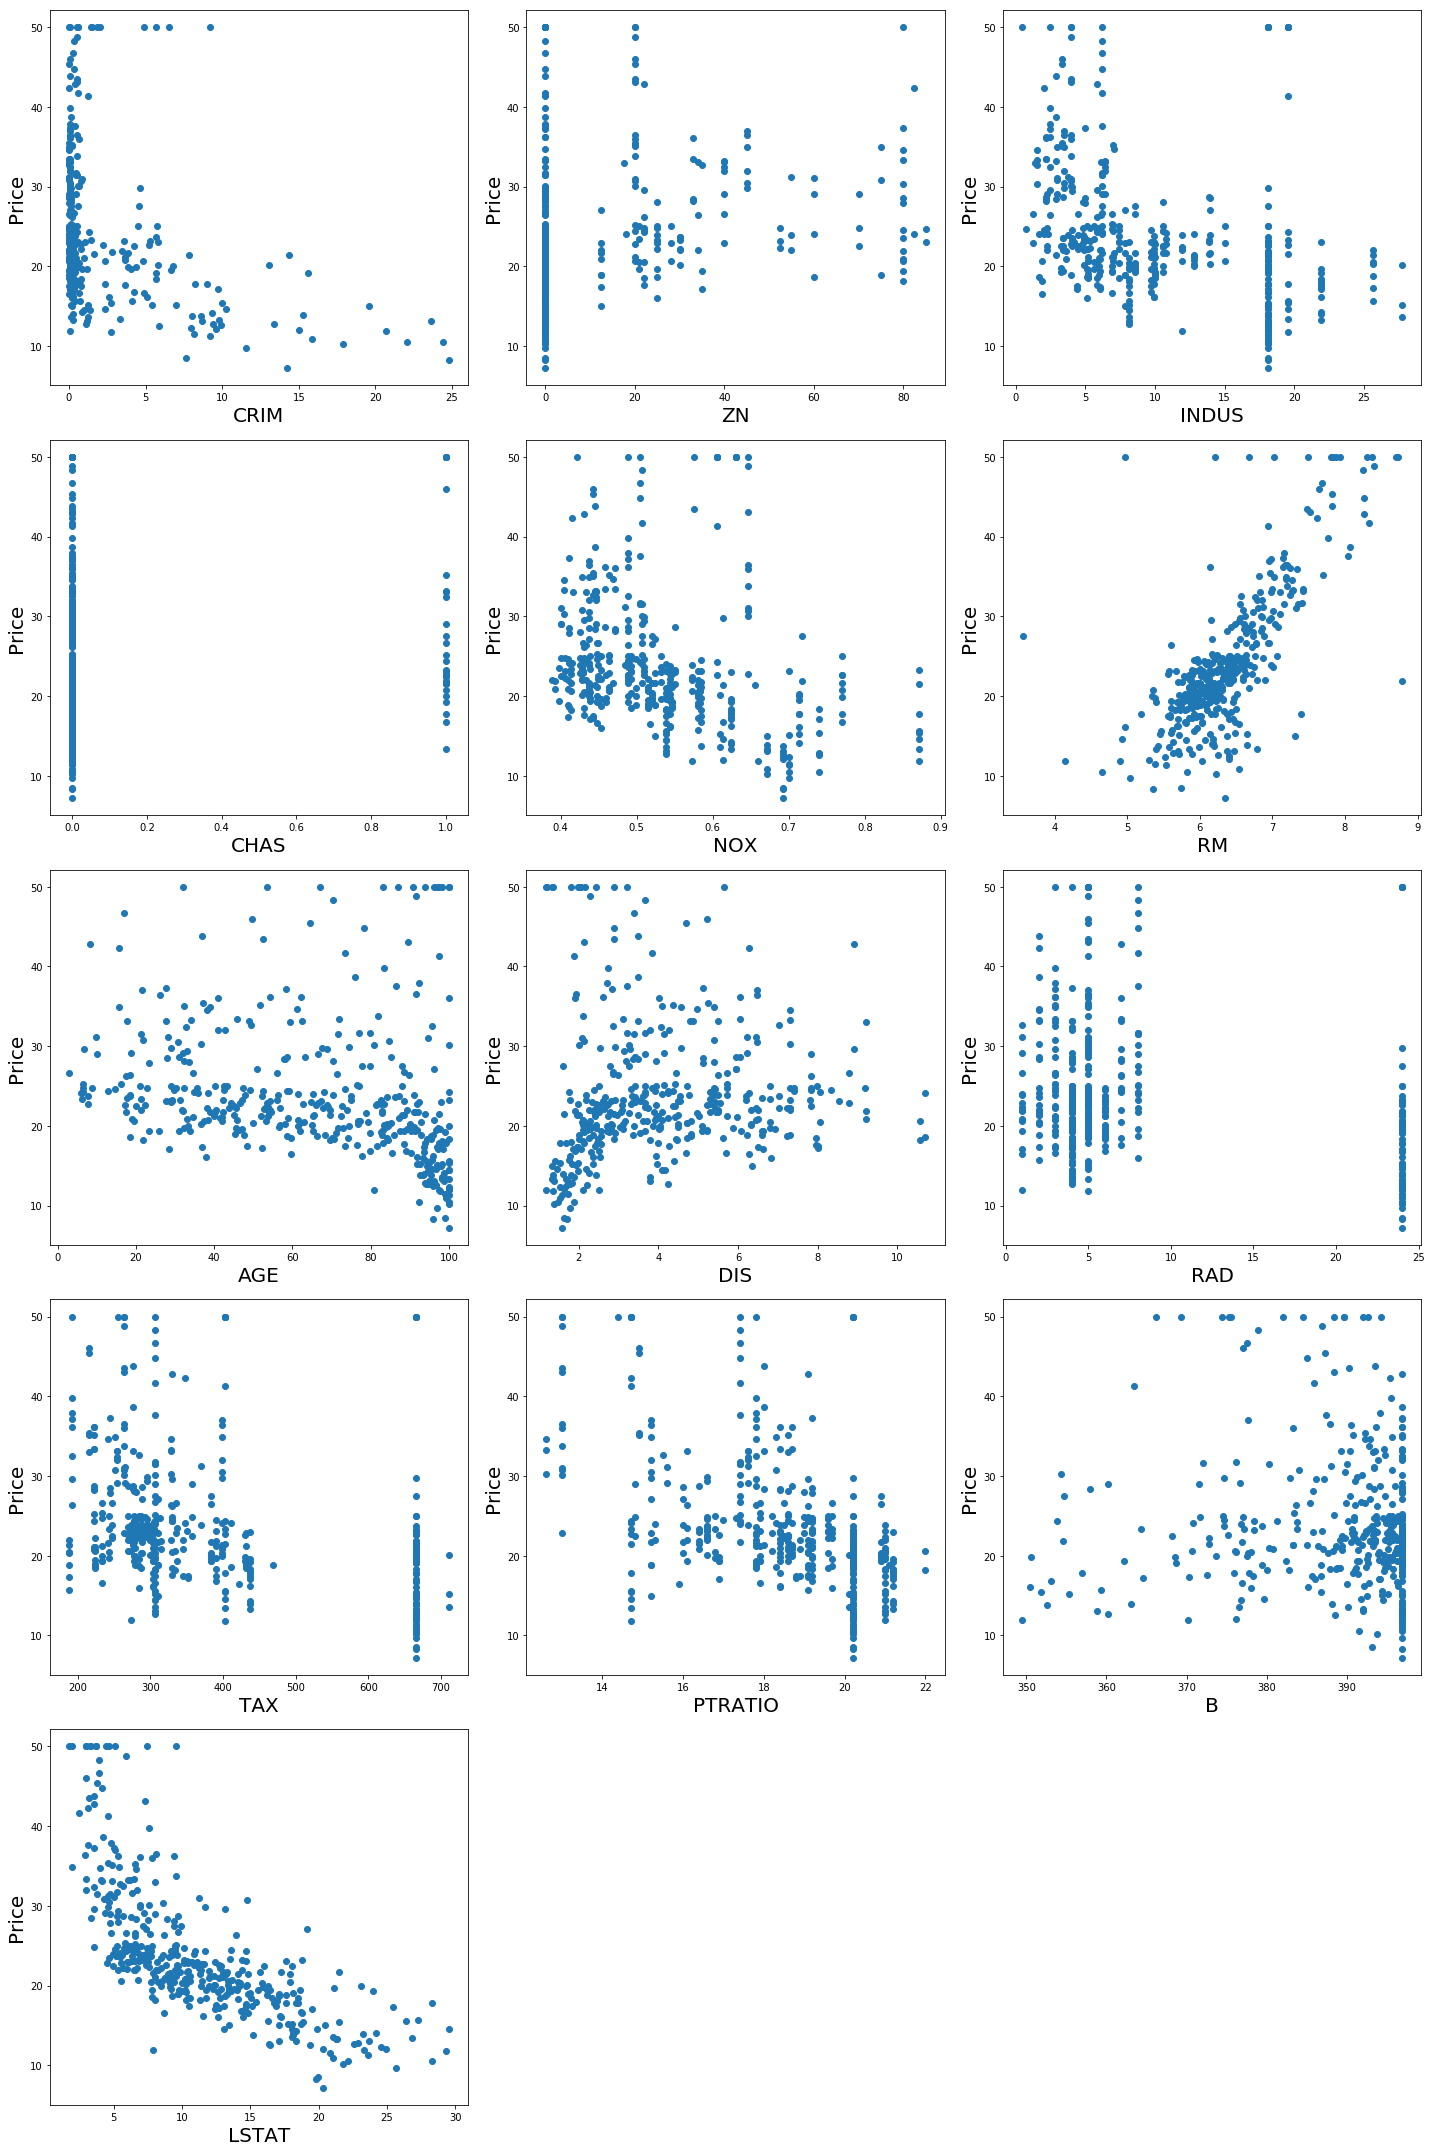

In [20]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in features:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(features[column],target)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

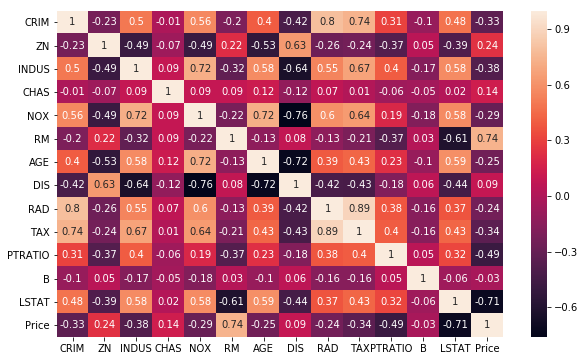

In [21]:
#We can also use correlation matrix here using heatmap:

correlation_matrix = data_cleaned.corr().round(2)
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data=correlation_matrix, annot=True, )
# annot = True to print the values inside the square

By looking at the correlation matrix and the scatter plot, we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.71)

As per now, let's take only these two features(RM, LSTAT) but later we can take PTRATIO too and compare the accuracy.

And now as we are taking these two features we should that they must not be correlated.

But, first let's scale our data!

In [63]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LinearRegression,Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import r2_score, mean_squared_error

In [24]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled

array([[-0.44788036,  0.28765914, -1.16251644, ..., -1.43923825,
         0.7510564 , -1.05259937],
       [-0.44263959, -0.53825791, -0.43657565, ..., -0.25794901,
         0.7510564 , -0.33351208],
       [-0.44264459, -0.53825791, -0.43657565, ..., -0.25794901,
         0.3681036 , -1.21681402],
       ...,
       [-0.43428783, -0.53825791,  0.304616  , ...,  1.2541012 ,
         0.7510564 , -0.9385134 ],
       [-0.42209601, -0.53825791,  0.304616  , ...,  1.2541012 ,
         0.42644039, -0.79331309],
       [-0.43762105, -0.53825791,  0.304616  , ...,  1.2541012 ,
         0.7510564 , -0.55131255]])

In [25]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(features_scaled,i) for i in range(features_scaled.shape[1])]
vif["Features"] = features.columns

#let's check the values
vif

,vif,Features
0,3.257529,CRIM
1,2.099188,ZN
2,3.323712,INDUS
3,1.072118,CHAS
4,4.467451,NOX
5,2.062092,RM
6,3.066603,AGE
7,3.702931,DIS
8,7.184779,RAD
9,6.837254,TAX


* The VIF values are less than 5 for RM and LSTAT. That means no multicollinearity between them.


In [27]:
x = features[['RM', 'LSTAT']]
x.head()

,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33


#### Model prepration:

In [28]:
x_scaled = scaler.fit_transform(x)

* Now, we can go ahead with fitting our data to the model.
* Before that, let's split our data in test and training set.

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, target, test_size = 0.2, random_state = 42)

In [31]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
print(lm.intercept_)
print("Coefficient for RM: ",lm.coef_[0])
print("Coefficient for LSTAT: ",lm.coef_[1])

24.01358047907623
Coefficient for RM:  4.245751863529355
Coefficient for LSTAT:  -3.6639447366360884


So, our model becomes:

$ Price = 24.014 + 4.25 * RM - 3.664 * LSTAT $

#### Model Prediction:

In [52]:
# make predictions for those x values and store them
preds = lm.predict(x_test)
preds

array([22.23183785, 21.43875922, 26.80730589, 29.80225032, 16.02123977,
       20.73892366, 27.32230739, 15.56303349, 22.52591473, 18.08094326,
       21.8799175 , 24.20619785, 26.91335524, 20.02004433, 17.43985754,
       24.63475406, 17.5993356 , 31.25815517, 18.21284416, 29.8859765 ,
       30.64711675, 26.40127706, 20.00806729, 25.81130936, 16.63814721,
       19.66197481, 26.18564   , 27.97843535, 21.2179429 , 24.21221874,
        5.72392397, 22.0323512 , 29.25822497, 22.40939856, 25.58403135,
       27.57942969, 27.65876589, 28.99661318, 26.14769312, 21.38362487,
       31.89874655,  2.27447588, 41.65143075,  9.08580621, 26.85966637,
       22.20830578, 25.44864444, 25.50452331, 23.89555852, 18.04915795,
       21.79531852, 17.98683858, 21.75780245, 23.4375041 , 19.71579316,
       11.74038771, 26.43603045, 28.11678794, 20.31903152, 32.18819446,
       20.96163985, 30.31134922, 20.56088739, 33.014159  , 28.55032799,
       39.66091913, 23.79455895, 23.77122111, 22.28961537, 25.46

In [50]:
np.asarray(y_test)

array([20.3, 21. , 23.1, 30.8, 19.4, 22.5, 23.3, 23.1, 19. ,  7.2, 17.7,
       22.2, 23.8, 19.1, 26.4, 23.1, 21.7, 36.5, 15. , 31.5, 33. , 22.4,
       16.7, 30.7, 17.8, 18.4, 25. , 23.7, 22.6, 23.1, 17.8, 20.1, 24. ,
       17.1, 23.2, 29.8, 23.5, 24.5, 22. , 19.9, 33.1, 11.9, 50. , 15.7,
       22.8, 17.5, 21. , 20.2, 24.4, 17.8, 22.6, 15.6, 18. , 23.4, 24.5,
       11.5, 24.8, 23.9, 19.3, 36.1, 19.4, 30.3, 20. , 37.9, 15. , 37.6,
       20.6, 18.5, 21. , 21.6, 36. , 13.1, 26.6, 28.1, 22.7, 28.7, 25. ,
       33.2, 22. , 11.3, 21.8])

#### Model Evaluation:

In [58]:
#R_squared:
R_squared = lm.score(x_train, y_train)

print("R-squared: ", R_squared)

R-squared:  0.6609916783044332


In [61]:
n = x_train.shape[0] #It is number of samples or observations in our data
p = x_train.shape[1] #It is the number of predictors or features in our data

Adj_Rsquared = 1-(1-R_squared) *(n-1)/(n-p-1)
#Applying the mathematical formula of our Adjusted R squared calculation

Adj_Rsquared

0.6588662342812635

As our Adj_Rsquared is lesser than R_squared that means we are penalized for using any feature. We'll later use only one feature and compare.

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

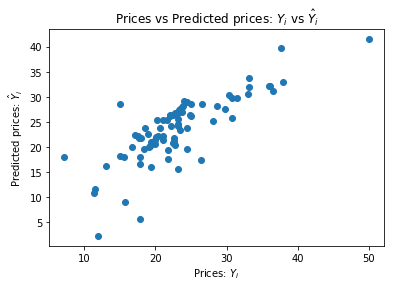

In [62]:
# Comparing our Prediction and actual values. Plot should look linear

plt.scatter(y_test, preds)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

We can summarize our model evaluation on both training and test dataset:

In [64]:
# model evaluation for training set

y_train_predict = lm.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lm.predict(x_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.188412984268857
R2 score is 0.6609916783044332


The model performance for testing set
--------------------------------------
RMSE is 4.286638617581429
R2 score is 0.6067663031818396


###### Our model is not performing good on test data. So, we can conclude that our model is overfitting.

So, we will use `Regularization` for this

In [65]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=100000, n_alphas=100, n_jobs=1, normalize=True,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [66]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.0004893905161233457

In [67]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.0004893905161233457, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [68]:
lasso_reg.score(x_test, y_test)

0.606785891567922

our r2_score for test data (% comes same as before using regularization. So, it is fair to say our Linear Regression model doesn't overfit the data.

In [69]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([9.16642, 1.26398, 2.61253, 8.69954, 2.29359, 8.35944, 8.72461,
       3.22612, 4.50807, 1.39458, 1.10711, 9.20639, 8.75116, 8.70736,
       1.1514 , 9.69278, 8.28076, 2.31106, 3.29767, 5.78417, 7.49151,
       0.80689, 9.95641, 0.60865, 5.73313, 1.63383, 2.58621, 7.62364,
       5.7089...397, 9.0122 ,
       4.26731, 8.17056, 9.31408, 2.46333, 4.45911, 7.9262 , 2.42152,
       0.74627]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
    store_cv_values=False)

In [70]:
ridgecv.alpha_

0.23742642560053984

In [71]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.23742642560053984, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [72]:
ridge_model.score(x_test, y_test)

0.6068856885796287

We got the same r2 square using Ridge regression as well. So, it's safe to say there is no overfitting.

#### Model Comparison

In [82]:
x_RM = features['RM']
x_LSTAT = features['LSTAT']

#### 1) Let's take only RM

In [83]:
x_rm_shaped = np.array(x_RM).reshape(-1,1)
target_shaped = np.array(target).reshape(-1,1)

In [84]:
x_train_rm, x_test_rm, y_train_rm, y_test_rm = train_test_split(x_rm_shaped, target_shaped, test_size = 0.2, random_state = 42)

In [85]:
lm_rm = LinearRegression()
lm_rm.fit(x_train_rm, y_train_rm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [87]:
# model evaluation for training set

y_train_predict_rm = lm_rm.predict(x_train_rm)
rmse = (np.sqrt(mean_squared_error(y_train_rm, y_train_predict_rm)))
r2 = r2_score(y_train_rm, y_train_predict_rm)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict_rm = lm_rm.predict(x_test_rm)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(y_test_rm, y_test_predict_rm)))

# r-squared score of the model
r2 = r2_score(y_test_rm, y_test_predict_rm)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.9393680251941365
R2 score is 0.5557558094012665


The model performance for testing set
--------------------------------------
RMSE is 4.8648795893934516
R2 score is 0.493521315014086


In [88]:
R_squared = r2_score(y_train_rm, y_train_predict_rm)
n = x_train_rm.shape[0] #It is number of samples or observations in our data
p = x_train_rm.shape[1] #It is the number of predictors or features in our data

Adj_Rsquared = 1-(1-R_squared) *(n-1)/(n-p-1)
#Applying the mathematical formula of our Adjusted R squared calculation

Adj_Rsquared

0.5543675463056454

As our Adjusted R-squared is very low as compared to our original two feature model. We will reject this model.

#### 2) Taking only LSTAT

In [89]:
x_ls_shaped = np.array(x_LSTAT).reshape(-1,1)
target_shaped = np.array(target).reshape(-1,1)

In [90]:
x_train_ls, x_test_ls, y_train_ls, y_test_ls = train_test_split(x_ls_shaped, target_shaped, test_size = 0.2, random_state = 42)

In [93]:
lm_ls = LinearRegression()
lm_ls.fit(x_train_ls, y_train_ls)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [95]:
# model evaluation for training set

y_train_predict_ls = lm_ls.predict(x_train_ls)
rmse = (np.sqrt(mean_squared_error(y_train_ls, y_train_predict_ls)))
r2 = r2_score(y_train_ls, y_train_predict_ls)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict_ls = lm_ls.predict(x_test_ls)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(y_test_ls, y_test_predict_ls)))

# r-squared score of the model
r2 = r2_score(y_test_ls, y_test_predict_ls)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 6.205575701483117
R2 score is 0.5150405350644858


The model performance for testing set
--------------------------------------
RMSE is 5.207184890964912
R2 score is 0.419739539036757


In [96]:
R_squared = r2_score(y_train_ls, y_train_predict_ls)
n = x_train_ls.shape[0] #It is number of samples or observations in our data
p = x_train_ls.shape[1] #It is the number of predictors or features in our data

Adj_Rsquared = 1-(1-R_squared) *(n-1)/(n-p-1)
#Applying the mathematical formula of our Adjusted R squared calculation

Adj_Rsquared

0.5135250367365622

Again, As our Adjusted R-squared is very low as compared to our original two feature model. We will reject this model.

### So, our final model is lm with features including RM and LSTAT

In [100]:
import pickle
# saving the model to the local file system
filename = 'first_linear_reg_model.pickle'
pickle.dump(lm, open(filename, 'wb'))

# Done !